# CNN application on MNIST

This is a study on the application of CNN to MNIST data set.

### Modules

We used *keras*, a powerful and user-friendly package, in this project, which wraps efficient numerical computation libraries *theano* and *TensorFlow*.

In [1]:
import numpy as np
import theano
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers.convolutional import MaxPooling2D
from matplotlib import pyplot as plt

Using TensorFlow backend.


## Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


### Unstructured input variable

Let us take a look at the images.

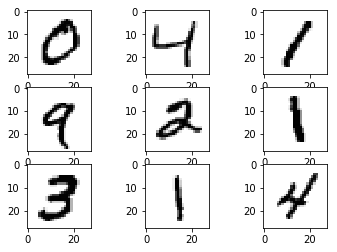

In [3]:
plt.figure()
for i in range(3):
    for j in range(3):
        k = i*3 + j + 1
        temp = 330 + k
        plt.subplot(temp)
        plt.imshow(X_train[k], cmap = "binary")
plt.show()

We notice that the MNIST data points are embedded in $28 \times 28$ dimensional space. Using theano notation, data are stored in the manner of (width, height, channel). So we need to reshape the data, where MNIST images only have a depth of 1.

In [4]:
# reshape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# normalize data [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Response variable

Text(0.5, 1.0, 'Counts of each number in the training data')

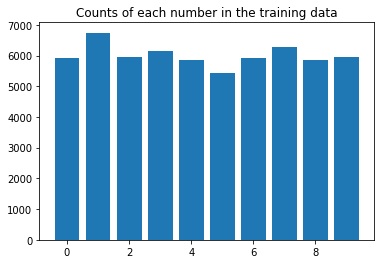

In [5]:
counts = []
for val in range(10):
    counts.append(sum(y_train == val))
plt.bar(np.arange(10), counts)
plt.title('Counts of each number in the training data')

We notice that the response variable is numerical. We need to convert it to categorical variables.

In [6]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
print(y_train.shape)

(60000, 10)


## Construct model architecture

Let us make a simple CNN model, using $3\times 3$ pooling plus a $2\times 2$ max pooling, followed by fully completed layer (*ReLU*) and a prediction layer (using *softmax*).

In [8]:
# Let's start by declaring a sequential model format:
model = Sequential()
# CNN input layer
# pooling: 28-3+1+2*p = 32
model.add(Conv2D(32, (3, 3), activation='relu')) # 32 * 32
model.add(MaxPooling2D(pool_size = (2,2))) # 16*16
model.add(Dropout(.25))

NameError: name 'Conv2D' is not defined

In [ ]:
# ReLu and softmax
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

## Compile and fit the model

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size = 32, nb_epoch = 10, verbose = 1)

## Evaluate the model fit

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)

In [ ]:
print('The model accuracy is : ', score[1]*100, '%')

## References

MNIST Database: http://yann.lecun.com/exdb/mnist/

MNIST Tutorial: https://elitedatascience.com/keras-tutorial-deep-learning-in-python

Coursera Deep Learning CNN: https://www.coursera.org/learn/convolutional-neural-networks/home/welcome